# **Master Thesis Christian Paul: Psychological Distress Before and During the COVID-19 Pandemic: Evidence from the NHIS 2018 and 2021**

## **1 Data and packages Loading**

In [78]:
# Install packages
%pip install polars pandas numpy seaborn matplotlib plotly 

Note: you may need to restart the kernel to use updated packages.


In [80]:
# Importing Libraries 
import polars as pl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import dataframe_image as dfi
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep

In [4]:
# Loading data

# Providing schema for the NHIS import 
schema = pl.Schema(
    [
        ("YEAR", pl.Int64()),
        ("SERIAL", pl.Int64()),
        ("STRATA", pl.Int64()),
        ("PSU", pl.Int64()),
        ("NHISHID", pl.String),
        ("HHWEIGHT", pl.Int64()),
        ("PERNUM", pl.Int64()),
        ("NHISPID", pl.String),
        ("HHX", pl.String),
        ("FMX", pl.String),
        ("PX", pl.Int64()),
        ("PERWEIGHT", pl.Float64()),
        ("SAMPWEIGHT", pl.Float64()),
        ("FWEIGHT", pl.Int64()),
        ("ASTATFLG", pl.Int64()),
        ("CSTATFLG", pl.Int64()),
        ("AGE", pl.Int64()),
        ("SEX", pl.Int64()),
        ("AEFFORT", pl.Int64()),
        ("AHOPELESS", pl.Int64()),
        ("ANERVOUS", pl.Int64()),
        ("ARESTLESS", pl.Int64()),
        ("ASAD", pl.Int64()),
        ("AWORTHLESS", pl.Int64()),
        ("CVDSHT", pl.Int64()),
    ]
)

df = pl.read_csv("nhis_00029.csv.gz", schema=schema)

print(df)

shape: (2_099_723, 25)
┌──────┬────────┬────────┬─────┬───┬───────────┬──────┬────────────┬────────┐
│ YEAR ┆ SERIAL ┆ STRATA ┆ PSU ┆ … ┆ ARESTLESS ┆ ASAD ┆ AWORTHLESS ┆ CVDSHT │
│ ---  ┆ ---    ┆ ---    ┆ --- ┆   ┆ ---       ┆ ---  ┆ ---        ┆ ---    │
│ i64  ┆ i64    ┆ i64    ┆ i64 ┆   ┆ i64       ┆ i64  ┆ i64        ┆ i64    │
╞══════╪════════╪════════╪═════╪═══╪═══════════╪══════╪════════════╪════════╡
│ 1997 ┆ 8      ┆ 5142   ┆ 2   ┆ … ┆ 0         ┆ 0    ┆ 0          ┆ null   │
│ 1997 ┆ 8      ┆ 5142   ┆ 2   ┆ … ┆ 6         ┆ 6    ┆ 6          ┆ null   │
│ 1997 ┆ 8      ┆ 5142   ┆ 2   ┆ … ┆ 6         ┆ 6    ┆ 6          ┆ null   │
│ 1997 ┆ 8      ┆ 5142   ┆ 2   ┆ … ┆ 6         ┆ 6    ┆ 6          ┆ null   │
│ 1997 ┆ 9      ┆ 5095   ┆ 2   ┆ … ┆ 6         ┆ 6    ┆ 6          ┆ null   │
│ …    ┆ …      ┆ …      ┆ …   ┆ … ┆ …         ┆ …    ┆ …          ┆ …      │
│ 2021 ┆ 30670  ┆ 102    ┆ 16  ┆ … ┆ 0         ┆ 0    ┆ 0          ┆ 1      │
│ 2021 ┆ 30670  ┆ 102    ┆ 16  ┆ … ┆ 6   

## **2 Data exploration and data engineering**

In [5]:
# Filterting only adults
df_filtered = df.filter(
    (pl.col("ASTATFLG") == 1)
)

print(df_filtered)

shape: (701_178, 25)
┌──────┬────────┬────────┬─────┬───┬───────────┬──────┬────────────┬────────┐
│ YEAR ┆ SERIAL ┆ STRATA ┆ PSU ┆ … ┆ ARESTLESS ┆ ASAD ┆ AWORTHLESS ┆ CVDSHT │
│ ---  ┆ ---    ┆ ---    ┆ --- ┆   ┆ ---       ┆ ---  ┆ ---        ┆ ---    │
│ i64  ┆ i64    ┆ i64    ┆ i64 ┆   ┆ i64       ┆ i64  ┆ i64        ┆ i64    │
╞══════╪════════╪════════╪═════╪═══╪═══════════╪══════╪════════════╪════════╡
│ 1997 ┆ 8      ┆ 5142   ┆ 2   ┆ … ┆ 0         ┆ 0    ┆ 0          ┆ null   │
│ 1997 ┆ 9      ┆ 5095   ┆ 2   ┆ … ┆ 0         ┆ 0    ┆ 9          ┆ null   │
│ 1997 ┆ 10     ┆ 5095   ┆ 2   ┆ … ┆ 0         ┆ 0    ┆ 0          ┆ null   │
│ 1997 ┆ 11     ┆ 5095   ┆ 2   ┆ … ┆ 0         ┆ 0    ┆ 0          ┆ null   │
│ 1997 ┆ 13     ┆ 5095   ┆ 2   ┆ … ┆ 0         ┆ 0    ┆ 0          ┆ null   │
│ …    ┆ …      ┆ …      ┆ …   ┆ … ┆ …         ┆ …    ┆ …          ┆ …      │
│ 2021 ┆ 30669  ┆ 144    ┆ 27  ┆ … ┆ 1         ┆ 0    ┆ 0          ┆ 2      │
│ 2021 ┆ 30670  ┆ 102    ┆ 16  ┆ … ┆ 0     

In [6]:
# Data adaptation
# Convert to Pandas for further processin
pdf = df_filtered.to_pandas()

# AGE
pdf['AGE'] = pd.to_numeric(pdf['AGE'], errors='coerce')

# SEX
pdf['SEX'] = pd.Categorical(
    pdf['SEX'].map({1: 'Male', 2: 'Female'}),
    categories=['Male', 'Female']
)

# Vaccination Status
pdf['CVDSHT_CLEAN'] = pd.Categorical(
    pdf['CVDSHT'].replace({0: np.nan, 7: np.nan, 8: np.nan, 9: np.nan}).map({1: 'No', 2: 'Yes'}),
    categories=['No', 'Yes']
)

# Kessler-6 Variables
k6_items = ['ASAD', 'ANERVOUS', 'ARESTLESS', 'AHOPELESS', 'AEFFORT', 'AWORTHLESS']
pdf[k6_items] = pdf[k6_items].replace({6: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})

In [7]:
# Screening missing values
selected_vars = [
    'YEAR', 'AGE', 'SEX'
] + k6_items  

analysis_df = pdf[selected_vars].copy()

# Calculate the absolute number of missing value
missing_summary = analysis_df.isnull().sum().sort_values(ascending=False)
print("Missing values (absolute count):\n", missing_summary)

Missing values (absolute count):
 AEFFORT       13782
AWORTHLESS    13580
AHOPELESS     13348
ARESTLESS     13210
ASAD          13040
ANERVOUS      13035
SEX               2
YEAR              0
AGE               0
dtype: int64


In [8]:
# Missing values in percentage
missing_summary = analysis_df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = missing_summary.round(2)  
print("Missingness (%):\n", missing_summary)

Missingness (%):
 AEFFORT       1.97
AWORTHLESS    1.94
AHOPELESS     1.90
ARESTLESS     1.88
ASAD          1.86
ANERVOUS      1.86
SEX           0.00
YEAR          0.00
AGE           0.00
dtype: float64


In [9]:
# Missing values 2018 and 2021

# Fucntion for calculating missing values in percent
def calculate_missingness(df, year):
    df_year = df[df['YEAR'] == year]
    missing = df_year.isnull().mean() * 100
    return missing.round(2)

# Missingness for 2018
missing_2018 = calculate_missingness(analysis_df, 2018)
print("Missingness in % für 2018:\n", missing_2018.sort_values(ascending=False))

# Missingness for 2021
missing_2021 = calculate_missingness(analysis_df, 2021)
print("\nMissingness in % für 2021:\n", missing_2021.sort_values(ascending=False))

Missingness in % für 2018:
 AEFFORT       2.63
AWORTHLESS    2.60
AHOPELESS     2.58
ARESTLESS     2.55
ASAD          2.51
ANERVOUS      2.51
YEAR          0.00
AGE           0.00
SEX           0.00
dtype: float64

Missingness in % für 2021:
 AEFFORT       2.65
AWORTHLESS    2.63
AHOPELESS     2.59
ANERVOUS      2.53
ARESTLESS     2.53
ASAD          2.50
SEX           0.01
YEAR          0.00
AGE           0.00
dtype: float64


In [10]:
# Drop all rows with any missing values
clean_df = analysis_df.dropna().copy()

In [11]:
# Check missing values after cleaning (absolute numbers)
missing_after_cleaning = clean_df.isnull().sum()

print("Missing values (absolute count) after cleaning:\n", missing_after_cleaning.sort_values(ascending=False))

Missing values (absolute count) after cleaning:
 YEAR          0
AGE           0
SEX           0
ASAD          0
ANERVOUS      0
ARESTLESS     0
AHOPELESS     0
AEFFORT       0
AWORTHLESS    0
dtype: int64


In [12]:
# Calculate K6 Score and refine Age Groups

# Calculate K6 Score from K6 items
k6_items = ['ASAD', 'ANERVOUS', 'ARESTLESS', 'AHOPELESS', 'AEFFORT', 'AWORTHLESS']
clean_df['K6_SCORE'] = clean_df[k6_items].sum(axis=1)

# Categorize psychological distress levels based on K6 score
def categorize_distress(score):
    if score >= 13:
        return 'High'
    elif score >= 5:
        return 'Moderate'
    else:
        return 'Low'

clean_df['K6_DISTRESS_LEVEL'] = clean_df['K6_SCORE'].apply(categorize_distress)
clean_df['K6_DISTRESS_LEVEL'] = pd.Categorical(
    clean_df['K6_DISTRESS_LEVEL'],
    categories=['Low', 'Moderate', 'High'],
    ordered=True
)

# Create fine age groups
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, np.inf]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']

# Apply age group labels
clean_df['AGE_GROUP'] = pd.cut(clean_df['AGE'], bins=age_bins, labels=age_labels, right=False)

## **3 Scanning through the main variables**

In [13]:
# Number of Observations per year in 2018 and 2021
obs_counts = clean_df[clean_df['YEAR'].isin([2018, 2021])]['YEAR'].value_counts().sort_index()

# Print results
print("Number of Observations per year:")
print(obs_counts)

Number of Observations per year:
YEAR
2018    24683
2021    28609
Name: count, dtype: int64


C:\Users\chris\AppData\Local\Temp\ipykernel_11980\189339631.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df_plot.groupby(['YEAR', 'AGE_GROUP']).size().unstack(fill_value=0)


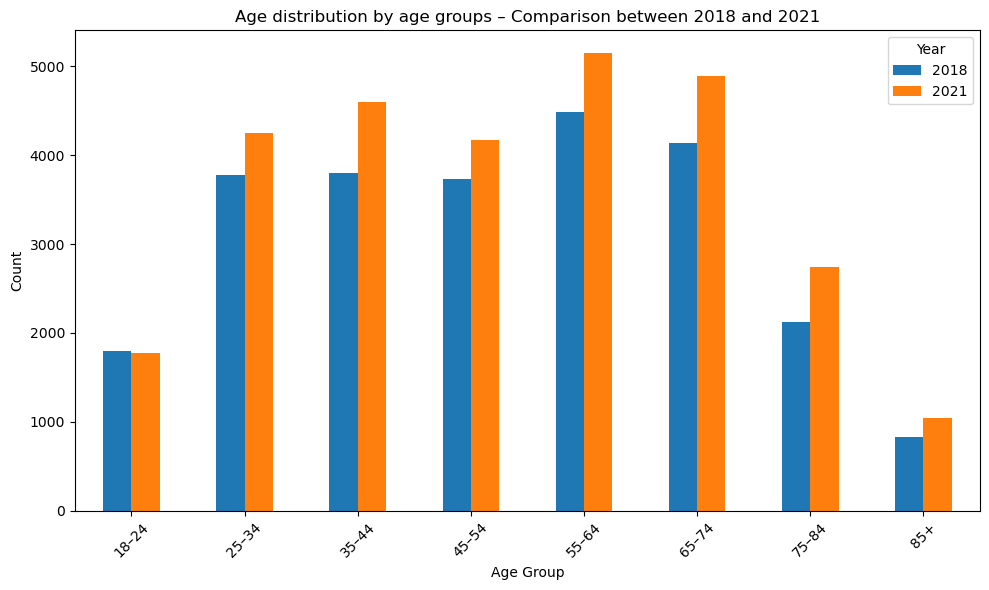

In [14]:
# Age distribution by age groups – Comparison between 2018 and 2021

# Extract data for 2018 and 2021 
df_plot = clean_df[clean_df['YEAR'].isin([2018, 2021])]

# Group by Year and Age Group
age_dist = df_plot.groupby(['YEAR', 'AGE_GROUP']).size().unstack(fill_value=0)

# Create Plot
age_dist.T.plot(kind='bar', figsize=(10, 6))
plt.title('Age distribution by age groups – Comparison between 2018 and 2021')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_11980\3946018366.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_dist = df_plot.groupby(['YEAR', 'SEX']).size().unstack(fill_value=0)


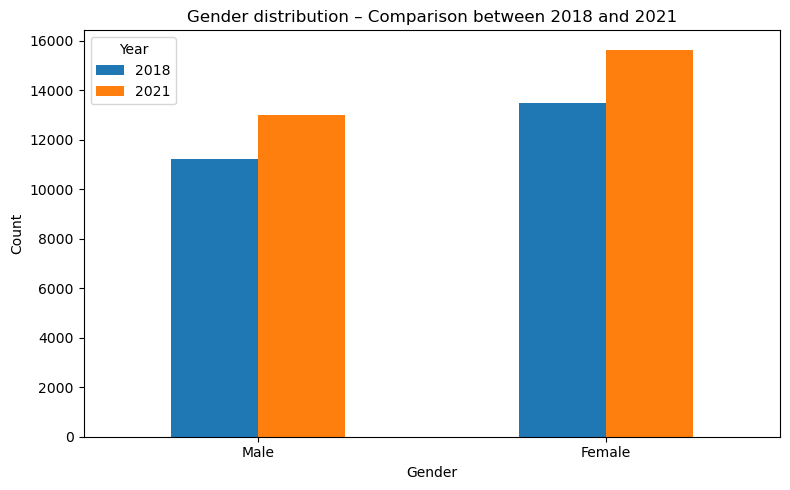

In [15]:
# Gender distribution – Comparison between 2018 and 2021

# Group by number per gender and year
gender_dist = df_plot.groupby(['YEAR', 'SEX']).size().unstack(fill_value=0)

# Create Plot
gender_dist.T.plot(kind='bar', figsize=(8, 5))
plt.title('Gender distribution – Comparison between 2018 and 2021')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

## **4 Testing for statistical significant changes in high and moderate distress prevalence - 2018 vs 2021**

In [67]:
# Population summary 2018 vs 2021

# Filter Year for 2018 and 2021
df_desc = clean_df[clean_df['YEAR'].isin([2018, 2021])].copy()

# Ensure Age Groups are correctly defined
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, np.inf]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
df_desc['AGE_GROUP'] = pd.cut(df_desc['AGE'], bins=age_bins, labels=age_labels, right=False)

# Ensure Sex Groups are correctly defined
df_desc['SEX'] = pd.Categorical(df_desc['SEX'], categories=['Female', 'Male'])

# Prepare summary dictionary
summary_dict = {
    'Variable': ['Total observations', 'Female (n,%)', 'Male (n,%)'] + [f'{age} (n,%)' for age in age_labels]
}

# Compute values for each year and add as a column
years = [2018, 2021]

for year in years:
    sub = df_desc[df_desc['YEAR'] == year]
    total_n = sub.shape[0]

    # Age Groups
    age_counts = sub['AGE_GROUP'].value_counts().sort_index()
    age_perc = (age_counts / total_n * 100).round(1).astype(str) + '%'

    # Sex
    sex_counts = sub['SEX'].value_counts().reindex(['Female', 'Male'])
    sex_perc = (sex_counts / total_n * 100).round(1).astype(str) + '%'

    # Fill values in order
    year_values = [
        total_n,
        f"{sex_counts['Female']} ({sex_perc['Female']})",
        f"{sex_counts['Male']} ({sex_perc['Male']})"
    ]

    for age in age_labels:
        count = age_counts.get(age, 0)
        perc = age_perc.get(age, '0.0%')
        year_values.append(f"{count} ({perc})")

    # Add to dictionary
    summary_dict[year] = year_values

# Convert to DataFrame
df_summary_vertical = pd.DataFrame(summary_dict)

# Styling
styled_01 = (
    df_summary_vertical.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "4px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "4px 6px"),
            ("border-top", "1px solid #999999"),
            ("border-bottom", "1px solid #999999"),
            ("border-right", "1px solid #999999"),
        ]},
        {"selector": "td:nth-child(3)", "props": [  # Add left border to 2021 column
            ("border-left", "2px solid black"),
        ]}
    ])
)

# Export
dfi.export(styled_01, "Figure_9_Population_Summary_2018_vs_2021.png", table_conversion="matplotlib")
print("Exported: Figure_9_Population_Summary_2018_vs_2021.png")

# Show in notebook
styled_01

Exported: Figure_9_Population_Summary_2018_vs_2021.png


Variable,2018,2021
Total observations,24683,28609
"Female (n,%)",13460 (54.5%),15630 (54.6%)
"Male (n,%)",11223 (45.5%),12979 (45.4%)
"18–24 (n,%)",1801 (7.3%),1779 (6.2%)
"25–34 (n,%)",3781 (15.3%),4244 (14.8%)
"35–44 (n,%)",3795 (15.4%),4602 (16.1%)
"45–54 (n,%)",3729 (15.1%),4167 (14.6%)
"55–64 (n,%)",4486 (18.2%),5145 (18.0%)
"65–74 (n,%)",4140 (16.8%),4884 (17.1%)
"75–84 (n,%)",2126 (8.6%),2743 (9.6%)


## **a) Moderate Distress**

In [81]:
# Moderate distress prevalence 2018 vs 2021 (not stratified by age)

# Data preparation
df_mod = clean_df[
    (clean_df['K6_DISTRESS_LEVEL'] == 'Moderate') &
    (clean_df['YEAR'].isin([2018, 2021]))
].copy()
denominator_df = clean_df[clean_df['YEAR'].isin([2018, 2021])].copy()

# Define groups: Total, Female, Male
group_levels = ['Total population', 'Female', 'Male']

results = []

for year in [2018, 2021]:
    # Total population
    n_total = df_mod[df_mod['YEAR'] == year].shape[0]
    N_total = denominator_df[denominator_df['YEAR'] == year].shape[0]
    results.append({
        'Group': 'Total population',
        'Year': year,
        'Cases': n_total,
        'Total': N_total,
        'Percent': (n_total / N_total) * 100 if N_total > 0 else np.nan
    })
    
    # Female
    n_female = df_mod[(df_mod['SEX'] == 'Female') & (df_mod['YEAR'] == year)].shape[0]
    N_female = denominator_df[(denominator_df['SEX'] == 'Female') & (denominator_df['YEAR'] == year)].shape[0]
    results.append({
        'Group': 'Female',
        'Year': year,
        'Cases': n_female,
        'Total': N_female,
        'Percent': (n_female / N_female) * 100 if N_female > 0 else np.nan
    })
    
    # Male
    n_male = df_mod[(df_mod['SEX'] == 'Male') & (df_mod['YEAR'] == year)].shape[0]
    N_male = denominator_df[(denominator_df['SEX'] == 'Male') & (denominator_df['YEAR'] == year)].shape[0]
    results.append({
        'Group': 'Male',
        'Year': year,
        'Cases': n_male,
        'Total': N_male,
        'Percent': (n_male / N_male) * 100 if N_male > 0 else np.nan
    })

# Convert to DataFrame
df_stats_overall = pd.DataFrame(results)

# Pivot to wide format
wide = df_stats_overall.pivot(index='Group', columns='Year', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(map(str, col)) for col in wide.columns]
wide = wide.reset_index()

# Statistical analysis
def compute_stats(row):
    count = np.array([row['Cases_2018'], row['Cases_2021']])
    nobs = np.array([row['Total_2018'], row['Total_2021']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(
    count1 = count[1], nobs1 = nobs[1],  # 2021
    count2 = count[0], nobs2 = nobs[0],  # 2018
    method='wald'
)

    p1 = count[0] / nobs[0]
    p2 = count[1] / nobs[1]
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. 2018 (%)': p1 * 100,
        'Prev. 2021 (%)': p2 * 100,
        'Δ (pp)': (p2 - p1) * 100,
        '95% CI': f"[{ci_low*100:.1f}, {ci_upp*100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_stats, axis=1)
final = pd.concat([wide[['Group']], stats_df], axis=1)

# Styling
final['Prev. 2018 (%)'] = final['Prev. 2018 (%)'].map('{:.1f}'.format)
final['Prev. 2021 (%)'] = final['Prev. 2021 (%)'].map('{:.1f}'.format)
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

# Significance stars
sup_star = {'1': '*', '2': '**', '3': '***'}
def get_superscript(p):
    if p < 0.001:
        return sup_star['3']
    elif p < 0.01:
        return sup_star['2']
    elif p < 0.05:
        return sup_star['1']
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Set column order
final = final[[
    'Group', 'Prev. 2018 (%)', 'Prev. 2021 (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
)

# Export
dfi.export(styled, "Figure_10_Moderate_Distress_Statistical_Test_Overall.png", table_conversion="matplotlib")
print("Exported: Figure_10_Moderate_Distress_Statistical_Test_Overall.png")

# Show in notebook
styled


Exported: Figure_10_Moderate_Distress_Statistical_Test_Overall.png


Group,Prev. 2018 (%),Prev. 2021 (%),Δ (pp),95% CI,p (z),Cohen's h
Female,20.0,18.7,-1.3,"[-2.3, -0.4]",0.0037**,0.03
Male,17.0,14.0,-3.0,"[-3.9, -2.1]",0.0000***,0.08
Total population,18.7,16.6,-2.1,"[-2.8, -1.5]",0.0000***,0.06


In [69]:
# Moderate distress prevalence 2018 vs 2021 startified by agre groups and sex

# Data Preperation
df_mod = clean_df[
    (clean_df['K6_DISTRESS_LEVEL'] == 'Moderate') &
    (clean_df['YEAR'].isin([2018, 2021]))
].copy()

dennominator_df = clean_df[clean_df['YEAR'].isin([2018, 2021])].copy()

# Define Age and Sex Groups
age_order = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
sex_order = ['Female', 'Male']
results = []

# Calculate prevalence
for age in age_order:
    for sex in sex_order:
        for year in [2018, 2021]:
            n = df_mod[
                (df_mod['AGE_GROUP'] == age) &
                (df_mod['SEX'] == sex) &
                (df_mod['YEAR'] == year)
            ].shape[0]
            N = dennominator_df[
                (dennominator_df['AGE_GROUP'] == age) &
                (dennominator_df['SEX'] == sex) &
                (dennominator_df['YEAR'] == year)
            ].shape[0]
            results.append({
                'Age': age,
                'Sex': sex,
                'Year': year,
                'Cases': n,
                'Total': N,
                'Percent': (n / N) * 100 if N > 0 else np.nan
            })

df_stats = pd.DataFrame(results)

# Pivot to wide format
wide = df_stats.pivot(index=['Age', 'Sex'], columns='Year', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(map(str, col)) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistical tests
def compute_stats(row):
    count = np.array([row['Cases_2018'], row['Cases_2021']])
    nobs = np.array([row['Total_2018'], row['Total_2021']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(
    count1=count[1], nobs1=nobs[1],  # 2021
    count2=count[0], nobs2=nobs[0],  # 2018
    method='wald'
)
    p1 = row['Percent_2018'] / 100
    p2 = row['Percent_2021'] / 100
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. 2018 (%)': p1 * 100,
        'Prev. 2021 (%)': p2 * 100,
        '95% CI': f"[{ci_low*100:.1f}, {ci_upp*100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_stats, axis=1)
final = pd.concat([wide[['Age', 'Sex']], stats_df], axis=1)

final['Prev. 2018 (%)'] = final['Prev. 2018 (%)'].round(1)
final['Prev. 2021 (%)'] = final['Prev. 2021 (%)'].round(1)


final['Δ (pp)'] = final['Prev. 2021 (%)'] - final['Prev. 2018 (%)']
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)

# Formating
final['Prev. 2018 (%)'] = final['Prev. 2018 (%)'].map('{:.1f}'.format)
final['Prev. 2021 (%)'] = final['Prev. 2021 (%)'].map('{:.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

# Significance stars
sup_star = {'1': '*', '2': '**', '3': '***'}
def get_superscript(p):
    if p < 0.001:
        return sup_star['3']
    elif p < 0.01:
        return sup_star['2']
    elif p < 0.05:
        return sup_star['1']
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Set columns order
final = final[[
    'Age', 'Sex', 'Prev. 2018 (%)', 'Prev. 2021 (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
    .set_properties(subset=['Prev. 2018 (%)', 'Prev. 2021 (%)'], **{'text-align': 'left'})
)

# Export
dfi.export(styled, "Figure_11_Moderate_Distress_Time_Trend_Stratified.png", table_conversion="matplotlib")
print("Figure_11_Moderate_Distress_Time_Trend_Stratified.png")

# Show styled table in notebook
styled


Figure_11_Moderate_Distress_Time_Trend_Stratified.png


Age,Sex,Prev. 2018 (%),Prev. 2021 (%),Δ (pp),95% CI,p (z),Cohen's h
18–24,Female,23.2,28.0,+4.8,"[0.8, 8.9]",0.0201*,0.11
18–24,Male,22.1,20.5,-1.6,"[-5.4, 2.2]",0.3985,0.04
25–34,Female,23.9,24.9,+1.0,"[-1.5, 3.6]",0.4155,0.02
25–34,Male,21.6,21.0,-0.6,"[-3.2, 2.0]",0.6606,0.01
35–44,Female,20.0,20.8,+0.8,"[-1.5, 3.2]",0.4671,0.02
35–44,Male,18.0,15.3,-2.7,"[-5.1, -0.4]",0.0215*,0.07
45–54,Female,20.7,18.4,-2.3,"[-4.7, 0.1]",0.0578,0.06
45–54,Male,15.9,12.0,-3.9,"[-6.2, -1.7]",0.0005***,0.11
55–64,Female,20.1,17.3,-2.8,"[-4.9, -0.7]",0.0092**,0.07
55–64,Male,16.7,12.8,-3.9,"[-6.0, -1.8]",0.0002***,0.11


## **b) High distess**

In [70]:
# High distress prevalence 2018 vs 2021 stratified by total population and sex

# Data preparation
df_mod = clean_df[
    (clean_df['K6_DISTRESS_LEVEL'] == 'High') &
    (clean_df['YEAR'].isin([2018, 2021]))
].copy()
dennominator_df = clean_df[clean_df['YEAR'].isin([2018, 2021])].copy()

group_order = ['Female', 'Male', 'Total population']
results = []

for group in group_order:
    for year in [2018, 2021]:
        if group == 'Total population':
            n = df_mod[df_mod['YEAR'] == year].shape[0]
            N = dennominator_df[dennominator_df['YEAR'] == year].shape[0]
        else:
            n = df_mod[
                (df_mod['SEX'] == group) &
                (df_mod['YEAR'] == year)
            ].shape[0]
            N = dennominator_df[
                (dennominator_df['SEX'] == group) &
                (dennominator_df['YEAR'] == year)
            ].shape[0]

        results.append({
            'Group': group,
            'Year': year,
            'Cases': n,
            'Total': N,
            'Percent': (n / N) * 100 if N > 0 else np.nan
        })

df_stats = pd.DataFrame(results)
wide = df_stats.pivot(index='Group', columns='Year', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(map(str, col)) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistical analysis
def compute_stats(row):
    count = np.array([row['Cases_2018'], row['Cases_2021']])
    nobs = np.array([row['Total_2018'], row['Total_2021']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(count[1], nobs[1], count[0], nobs[0], method='wald')
    p1 = count[0] / nobs[0]
    p2 = count[1] / nobs[1]
    h = 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))
    return pd.Series({
        'Prev. 2018 (%)': p1 * 100,
        'Prev. 2021 (%)': p2 * 100,
        'Δ (pp)': (p2 - p1) * 100,
        '95% CI': f"[{ci_low*100:.1f}, {ci_upp*100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_stats, axis=1)
final = pd.concat([wide[['Group']], stats_df], axis=1)

# Styling numbers
final['Prev. 2018 (%)'] = final['Prev. 2018 (%)'].map('{:.1f}'.format)
final['Prev. 2021 (%)'] = final['Prev. 2021 (%)'].map('{:.1f}'.format)
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

# Significance stars
sup_star = {'1': '*', '2': '**', '3': '***'}
def get_superscript(p):
    if p < 0.001:
        return sup_star['3']
    elif p < 0.01:
        return sup_star['2']
    elif p < 0.05:
        return sup_star['1']
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Set columns order
final = final[[
    'Group', 'Prev. 2018 (%)', 'Prev. 2021 (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Reorder rows according to desired display order
final['Group'] = pd.Categorical(final['Group'], categories=group_order, ordered=True)
final = final.sort_values('Group').reset_index(drop=True)

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
    .set_properties(subset=['Prev. 2018 (%)', 'Prev. 2021 (%)'], **{'text-align': 'left'})
)

# Export
dfi.export(styled, "Figure_12_High_Distress_Statistical_Test_OverallL.png", table_conversion="matplotlib")
print("Exported: Figure_12_High_Distress_Statistical_Test_Overall.png")

# Show styled table in notebook
styled


Exported: Figure_12_High_Distress_Statistical_Test_Overall.png


Group,Prev. 2018 (%),Prev. 2021 (%),Δ (pp),95% CI,p (z),Cohen's h
Female,4.9,4.2,-0.7,"[-1.1, -0.2]",0.0066**,0.03
Male,3.0,2.7,-0.3,"[-0.7, 0.1]",0.1487,0.02
Total population,4.0,3.5,-0.5,"[-0.8, -0.2]",0.0024**,0.03


In [71]:
# High distress prevalence 2018 vs 2021 startified by age groups and sex

# Data preperation
df_high = clean_df[
    (clean_df['K6_DISTRESS_LEVEL'] == 'High') &
    (clean_df['YEAR'].isin([2018, 2021]))
].copy()

denominator_df = clean_df[clean_df['YEAR'].isin([2018, 2021])].copy()

# Define age and sex group order
age_order = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
sex_order = ['Female', 'Male']
results = []

# Calculate number of cases and percentages per group
for age in age_order:
    for sex in sex_order:
        for year in [2018, 2021]:
            n = df_high[
                (df_high['AGE_GROUP'] == age) &
                (df_high['SEX'] == sex) &
                (df_high['YEAR'] == year)
            ].shape[0]
            N = denominator_df[
                (denominator_df['AGE_GROUP'] == age) &
                (denominator_df['SEX'] == sex) &
                (denominator_df['YEAR'] == year)
            ].shape[0]
            results.append({
                'Age': age,
                'Sex': sex,
                'Year': year,
                'Cases': n,
                'Total': N,
                'Percent': (n / N) * 100 if N > 0 else np.nan
            })

df_stats = pd.DataFrame(results)

# Reshape data to wide format
wide = df_stats.pivot(index=['Age', 'Sex'], columns='Year', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(map(str, col)) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistical Analysis

def compute_stats(row):
    count = np.array([row['Cases_2018'], row['Cases_2021']])
    nobs = np.array([row['Total_2018'], row['Total_2021']])
    
    stat, pval_z = proportions_ztest(count, nobs)
    
    # Swap order here so CI matches the direction of the difference (2021 - 2018)
    ci_low, ci_upp = confint_proportions_2indep(
        count1=count[1], nobs1=nobs[1],  # 2021
        count2=count[0], nobs2=nobs[0],  # 2018
        method='wald'
    )
    
    p1 = count[0] / nobs[0]
    p2 = count[1] / nobs[1]
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. 2018 (%)': p1 * 100,
        'Prev. 2021 (%)': p2 * 100,
        '95% CI': f"[{ci_low*100:.1f}, {ci_upp*100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })


# Apply statistics to each row
stats_df = wide.apply(compute_stats, axis=1)
final = pd.concat([wide[['Age', 'Sex']], stats_df], axis=1)

# Formatting

final['Prev. 2018 (%)'] = final['Prev. 2018 (%)'].round(1)
final['Prev. 2021 (%)'] = final['Prev. 2021 (%)'].round(1)

final['Δ (pp)'] = final['Prev. 2021 (%)'] - final['Prev. 2018 (%)']
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)

final['Prev. 2018 (%)'] = final['Prev. 2018 (%)'].map('{:.1f}'.format)
final['Prev. 2021 (%)'] = final['Prev. 2021 (%)'].map('{:.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

# Add significance stars to p-values
sup_star = {'1': '*', '2': '**', '3': '***'}
def get_superscript(p):
    if p < 0.001:
        return sup_star['3']
    elif p < 0.01:
        return sup_star['2']
    elif p < 0.05:
        return sup_star['1']
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Set final column order
final = final[[
    'Age', 'Sex', 'Prev. 2018 (%)', 'Prev. 2021 (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling

styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
    .set_properties(subset=['Prev. 2018 (%)', 'Prev. 2021 (%)'], **{'text-align': 'left'})
)

# Export 
dfi.export(styled, "Figure_13_High_Distress_Time_Trend_Stratified.png", table_conversion="matplotlib")
print("Figure_13_High_Distress_Time_Trend_Stratified.png")

# Display table in Jupyter notebook
styled


Figure_13_High_Distress_Time_Trend_Stratified.png


Age,Sex,Prev. 2018 (%),Prev. 2021 (%),Δ (pp),95% CI,p (z),Cohen's h
18–24,Female,4.4,8.1,+3.7,"[1.5, 6.0]",0.0010***,0.16
18–24,Male,1.9,2.9,+1.0,"[-0.4, 2.4]",0.1528,0.07
25–34,Female,4.8,5.4,+0.6,"[-0.7, 1.9]",0.3743,0.03
25–34,Male,3.1,3.7,+0.6,"[-0.6, 1.7]",0.3466,0.03
35–44,Female,5.5,4.0,-1.5,"[-2.8, -0.3]",0.0165*,0.07
35–44,Male,3.5,2.6,-0.9,"[-1.9, 0.3]",0.1436,0.05
45–54,Female,6.4,4.5,-1.9,"[-3.2, -0.5]",0.0081**,0.08
45–54,Male,3.8,3.5,-0.3,"[-1.5, 0.9]",0.6318,0.02
55–64,Female,6.0,4.8,-1.2,"[-2.4, 0.1]",0.0692,0.05
55–64,Male,3.8,3.1,-0.7,"[-1.8, 0.3]",0.1795,0.04


## **5 Moderate and high distress in 2021 - stratified by vaccination stauts**

In [26]:
# Create new dataset for vaccination status analysis in 2021
# Filter for Year = 2021
df_base = pdf[pdf['YEAR'] == 2021].copy()


In [27]:
# Missing values vaccination status

# Missing vlaues in 'CVDSHT_CLEAN'
total_rows = len(df_base)
na_count = df_base['CVDSHT_CLEAN'].isna().sum()
na_percent = (na_count / total_rows) * 100

# Overview as DataFrame
cvd_na_summary = pd.DataFrame({
    'Missing values': [na_count],
    'Percent (%)': [round(na_percent, 2)]
})

print(cvd_na_summary)

   Missing values  Percent (%)
0            7950        26.97


In [28]:
# Filter dataset only with available vaccination status
df_vac = df_base[df_base['CVDSHT_CLEAN'].notna()].copy()

In [29]:
# Check missing values in the vaccination status dataset

# Select variables
selected_vars = ['YEAR', 'AGE', 'SEX'] + k6_items

# Create copy of df_vac
analysis_df = df_vac[selected_vars].copy()

# Calculate missing values
total_n = len(analysis_df)
missing_counts = analysis_df.isnull().sum()
missing_percent = (missing_counts / total_n * 100).round(2)

# Create table
missing_summary = pd.DataFrame({
    'Missing values': missing_counts,
    'Percent (%)': missing_percent
}).sort_values(by='Missing values', ascending=False)

# Print table
print(missing_summary)


            Missing values  Percent (%)
AEFFORT                261         1.21
AWORTHLESS             251         1.17
AHOPELESS              242         1.12
ANERVOUS               235         1.09
ARESTLESS              231         1.07
ASAD                   230         1.07
SEX                      1         0.00
YEAR                     0         0.00
AGE                      0         0.00


In [30]:
# Remove missing values
clean_df_vac = df_vac.dropna(subset=selected_vars).copy()

# Check missing values after cleaning
remaining_nas = clean_df_vac[selected_vars].isnull().sum()
print("Remaining missing values after cleaning:\n", remaining_nas)

Remaining missing values after cleaning:
 YEAR          0
AGE           0
SEX           0
ASAD          0
ANERVOUS      0
ARESTLESS     0
AHOPELESS     0
AEFFORT       0
AWORTHLESS    0
dtype: int64


In [72]:
# Population summary stratified by vaccination status

# Filter only 2021 data with valid vaccination status
df_base = clean_df_vac[clean_df_vac['YEAR'] == 2021].copy()

# Define age groups
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, np.inf]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
df_base['AGE_GROUP'] = pd.cut(df_base['AGE'], bins=age_bins, labels=age_labels, right=False)

# Clean and recode Sex variable
if df_base['SEX'].dropna().astype(str).str.isnumeric().all():
    df_base['SEX'] = df_base['SEX'].map({1: 'Male', 2: 'Female'})

df_base['SEX'] = pd.Categorical(df_base['SEX'], categories=['Female', 'Male'])

# Prepare summary
summary = []

# Define variable order for table
variable_order = ['Total observations', 'Female (n,%)', 'Male (n,%)'] + [f"{age} (n,%)" for age in age_labels]

# Build summary rows (Variable is index, Vaccinated and Unvaccinated are columns)
for variable in variable_order:
    row = {'Variable': variable}

    for group in ['Yes', 'No']:
        sub = df_base[df_base['CVDSHT_CLEAN'] == group]
        total_n = sub.shape[0]

        if variable == 'Total observations':
            value = total_n
        elif variable in ['Female (n,%)', 'Male (n,%)']:
            sex = variable.split(' ')[0]
            count = sub['SEX'].value_counts().get(sex, 0)
            perc = (count / total_n * 100).round(1)
            value = f"{count} ({perc}%)"
        else:
            age_label = variable.split(' ')[0]
            count = sub['AGE_GROUP'].value_counts().get(age_label, 0)
            perc = (count / total_n * 100).round(1)
            value = f"{count} ({perc}%)"

        # Column names: Vaccinated, Unvaccinated
        col_name = 'Vaccinated' if group == 'Yes' else 'Unvaccinated'
        row[col_name] = value

    summary.append(row)

# Convert to DataFrame
df_summary = pd.DataFrame(summary)

# Style the table for export
styled = (
    df_summary.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "6px 4px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "6px 4px"),
            ("border", "1px solid #999999")
        ]}
    ])
    .set_properties(subset=['Variable'], **{'text-align': 'left'})  # Variable column left aligned
)

# Export the styled table as a PNG image
dfi.export(styled, "Figure_14_Group_Characteristics_Vaccination_Status.png", table_conversion="matplotlib")
print("Figure_14_Group_Characteristics_Vaccination_Status.png")

# Display in notebook
styled


Figure_14_Group_Characteristics_Vaccination_Status.png


Variable,Vaccinated,Unvaccinated
Total observations,15960,5252
"Female (n,%)",8792 (55.1%),2795 (53.2%)
"Male (n,%)",7168 (44.9%),2457 (46.8%)
"18–24 (n,%)",740 (4.6%),582 (11.1%)
"25–34 (n,%)",1890 (11.8%),1163 (22.1%)
"35–44 (n,%)",2342 (14.7%),1069 (20.4%)
"45–54 (n,%)",2274 (14.2%),871 (16.6%)
"55–64 (n,%)",3025 (19.0%),751 (14.3%)
"65–74 (n,%)",3211 (20.1%),486 (9.3%)
"75–84 (n,%)",1810 (11.3%),229 (4.4%)


In [73]:
# Test moderate psychological distress in the vaccinated vs in the unvaccinated population 

# Data preperation
df_vac = pdf[pdf['YEAR'] == 2021].copy()
df_vac = df_vac[df_vac['CVDSHT_CLEAN'].notna()]

# Calculate K6 Score
k6_items = ['ASAD', 'ANERVOUS', 'ARESTLESS', 'AHOPELESS', 'AEFFORT', 'AWORTHLESS']
df_vac[k6_items] = df_vac[k6_items].replace({6: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})
df_vac['K6_SCORE'] = df_vac[k6_items].sum(axis=1)

def categorize_distress(score):
    if score >= 13:
        return 'High'
    elif score >= 5:
        return 'Moderate'
    else:
        return 'Low'

df_vac['K6_DISTRESS_LEVEL'] = df_vac['K6_SCORE'].apply(categorize_distress)

# Subset: Moderate distress
df_mod = df_vac[df_vac['K6_DISTRESS_LEVEL'] == 'Moderate'].copy()
denominator_df = df_vac.copy()

# Statistic
results = []

for sex in ['Female', 'Male']:
    for vac_status in ['Yes', 'No']:
        n = df_mod[(df_mod['SEX'] == sex) & (df_mod['CVDSHT_CLEAN'] == vac_status)].shape[0]
        N = denominator_df[(denominator_df['SEX'] == sex) & (denominator_df['CVDSHT_CLEAN'] == vac_status)].shape[0]
        results.append({
            'Group': sex,
            'Vaccinated': vac_status,
            'Cases': n,
            'Total': N,
            'Percent': (n / N) * 100 if N > 0 else np.nan
        })

for vac_status in ['Yes', 'No']:
    n = df_mod[df_mod['CVDSHT_CLEAN'] == vac_status].shape[0]
    N = denominator_df[denominator_df['CVDSHT_CLEAN'] == vac_status].shape[0]
    results.append({
        'Group': 'Total',
        'Vaccinated': vac_status,
        'Cases': n,
        'Total': N,
        'Percent': (n / N) * 100 if N > 0 else np.nan
    })

df_stats = pd.DataFrame(results)

# Pivot afor wide format
wide = df_stats.pivot(index='Group', columns='Vaccinated', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(col) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistic
def compute_vac_stats(row):
    count = np.array([row['Cases_No'], row['Cases_Yes']])
    nobs = np.array([row['Total_No'], row['Total_Yes']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(
        count1=count[1], nobs1=nobs[1],
        count2=count[0], nobs2=nobs[0],
        method='score'  # robuster als 'wald'
    )
    p1 = row['Percent_No'] / 100
    p2 = row['Percent_Yes'] / 100
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. Unvacc (%)': p1 * 100,
        'Prev. Vacc (%)': p2 * 100,
        '95% CI': f"[{ci_low * 100:.1f}, {ci_upp * 100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_vac_stats, axis=1)
final = pd.concat([wide[['Group']], stats_df], axis=1)

# Formating
final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].round(1)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].round(1)
final['Δ (pp)'] = final['Prev. Vacc (%)'] - final['Prev. Unvacc (%)']
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)
final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].map('{:.1f}'.format)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].map('{:.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

def get_superscript(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Define columns oder
final = final[[
    'Group', 'Prev. Unvacc (%)', 'Prev. Vacc (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
)

# Export
import dataframe_image as dfi
dfi.export(styled, "Figure_15_Moderate_Distress_Vaccination_Status_Overall.png", table_conversion="matplotlib")
print("Figure_15_Moderate_Distress_Vacccination_Status_Overall.png")

# Display in notebook
styled


Figure_15_Moderate_Distress_Vacccination_Status_Overall.png


Group,Prev. Unvacc (%),Prev. Vacc (%),Δ (pp),95% CI,p (z),Cohen's h
Female,19.5,18.1,-1.4,"[-3.2, 0.2]",0.0790,0.04
Male,13.7,13.8,+0.1,"[-1.5, 1.6]",0.9389,0.00
Total,16.8,16.1,-0.7,"[-1.8, 0.5]",0.2571,0.02


In [74]:
# Test moderate psychological distress in the vaccinated vs in the unvaccinated population - stratified by sex and age groups

# Data preperation
# Filter 2021 data with valid vaccination status

df_vac = pdf[pdf['YEAR'] == 2021].copy()
df_vac = df_vac[df_vac['CVDSHT_CLEAN'].notna()]

# Compute K6 distress score

k6_items = ['ASAD', 'ANERVOUS', 'ARESTLESS', 'AHOPELESS', 'AEFFORT', 'AWORTHLESS']
df_vac[k6_items] = df_vac[k6_items].replace({6: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})
df_vac['K6_SCORE'] = df_vac[k6_items].sum(axis=1)

def categorize_distress(score):
    if score >= 13:
        return 'High'
    elif score >= 5:
        return 'Moderate'
    else:
        return 'Low'

df_vac['K6_DISTRESS_LEVEL'] = df_vac['K6_SCORE'].apply(categorize_distress)
df_vac['K6_DISTRESS_LEVEL'] = pd.Categorical(
    df_vac['K6_DISTRESS_LEVEL'],
    categories=['Low', 'Moderate', 'High'],
    ordered=True
)

# Define age groups

age_bins = [18, 25, 35, 45, 55, 65, 75, 85, np.inf]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
df_vac['AGE_GROUP'] = pd.cut(df_vac['AGE'], bins=age_bins, labels=age_labels, right=False)

# Subset for Moderate distress only

df_mod = df_vac[df_vac['K6_DISTRESS_LEVEL'] == 'Moderate'].copy()
denominator_df = df_vac.copy()

#  Calculate counts and prevalence per Age × Sex × Vaccination

age_order = age_labels
sex_order = ['Female', 'Male']
results = []

for age in age_order:
    for sex in sex_order:
        for vac_status in ['Yes', 'No']:
            n = df_mod[
                (df_mod['AGE_GROUP'] == age) &
                (df_mod['SEX'] == sex) &
                (df_mod['CVDSHT_CLEAN'] == vac_status)
            ].shape[0]
            N = denominator_df[
                (denominator_df['AGE_GROUP'] == age) &
                (denominator_df['SEX'] == sex) &
                (denominator_df['CVDSHT_CLEAN'] == vac_status)
            ].shape[0]
            results.append({
                'Age': age,
                'Sex': sex,
                'Vaccinated': vac_status,
                'Cases': n,
                'Total': N,
                'Percent': (n / N) * 100 if N > 0 else np.nan
            })

df_stats = pd.DataFrame(results)

# Pivot to wide format 
wide = df_stats.pivot(index=['Age', 'Sex'], columns='Vaccinated', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(map(str, col)) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistical tests

def compute_vac_stats(row):
    count = np.array([row['Cases_No'], row['Cases_Yes']])
    nobs = np.array([row['Total_No'], row['Total_Yes']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(
        count1=count[1], nobs1=nobs[1],
        count2=count[0], nobs2=nobs[0],
        method='wald'
    )
    # Use raw percentages only for effect size
    p1 = row['Percent_No'] / 100
    p2 = row['Percent_Yes'] / 100
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. Unvacc (%)': p1 * 100,
        'Prev. Vacc (%)': p2 * 100,
        '95% CI': f"[{ci_low * 100:.1f}, {ci_upp * 100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_vac_stats, axis=1)
final = pd.concat([wide[['Age', 'Sex']], stats_df], axis=1)

# Round displayed values and calculate Δ(pp) from rounded numbers

final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].round(1)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].round(1)

final['Δ (pp)'] = final['Prev. Vacc (%)'] - final['Prev. Unvacc (%)']
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)

# Format all columns for display
final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].map('{:.1f}'.format)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].map('{:.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

# Add significance stars to p-values 

def get_superscript(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Final column order
final = final[[
    'Age', 'Sex', 'Prev. Unvacc (%)', 'Prev. Vacc (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
    .set_properties(subset=['Prev. Unvacc (%)', 'Prev. Vacc (%)'], **{'text-align': 'left'})
)

# Export
dfi.export(styled, "Figure_16_Moderate_Distress_Vaccination_Stratified.png", table_conversion="matplotlib")
print("Figure_16_Moderate_Distress_Vaccination_Stratified.png")

# Display in notebook 
styled


Figure_16_Moderate_Distress_Vaccination_Stratified.png


Age,Sex,Prev. Unvacc (%),Prev. Vacc (%),Δ (pp),95% CI,p (z),Cohen's h
18–24,Female,24.5,31.2,+6.7,"[-0.1, 13.5]",0.0564,0.15
18–24,Male,15.9,21.2,+5.3,"[-0.5, 11.2]",0.0778,0.14
25–34,Female,23.8,26.1,+2.3,"[-1.9, 6.5]",0.2898,0.05
25–34,Male,17.3,23.2,+5.9,"[1.7, 10.2]",0.0074**,0.15
35–44,Female,20.0,20.5,+0.5,"[-3.4, 4.5]",0.7903,0.01
35–44,Male,12.2,16.3,+4.1,"[0.5, 7.6]",0.0326*,0.12
45–54,Female,17.8,18.4,+0.6,"[-3.7, 4.8]",0.7968,0.01
45–54,Male,11.5,11.8,+0.3,"[-3.2, 3.8]",0.8661,0.01
55–64,Female,16.5,16.9,+0.4,"[-3.6, 4.4]",0.8506,0.01
55–64,Male,14.0,12.5,-1.5,"[-5.5, 2.5]",0.4485,0.04


In [76]:
# Test High psychological distress in the vaccinated vs in the unvaccinated population 

# Data preperation
df_vac = pdf[pdf['YEAR'] == 2021].copy()
df_vac = df_vac[df_vac['CVDSHT_CLEAN'].notna()]

# Calculate K6 Score
k6_items = ['ASAD', 'ANERVOUS', 'ARESTLESS', 'AHOPELESS', 'AEFFORT', 'AWORTHLESS']
df_vac[k6_items] = df_vac[k6_items].replace({6: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})
df_vac['K6_SCORE'] = df_vac[k6_items].sum(axis=1)

def categorize_distress(score):
    if score >= 13:
        return 'High'
    elif score >= 5:
        return 'Moderate'
    else:
        return 'Low'

df_vac['K6_DISTRESS_LEVEL'] = df_vac['K6_SCORE'].apply(categorize_distress)

# Subset: High distress
df_mod = df_vac[df_vac['K6_DISTRESS_LEVEL'] == 'High'].copy()
denominator_df = df_vac.copy()

# Statistic
results = []

for sex in ['Female', 'Male']:
    for vac_status in ['Yes', 'No']:
        n = df_mod[(df_mod['SEX'] == sex) & (df_mod['CVDSHT_CLEAN'] == vac_status)].shape[0]
        N = denominator_df[(denominator_df['SEX'] == sex) & (denominator_df['CVDSHT_CLEAN'] == vac_status)].shape[0]
        results.append({
            'Group': sex,
            'Vaccinated': vac_status,
            'Cases': n,
            'Total': N,
            'Percent': (n / N) * 100 if N > 0 else np.nan
        })

for vac_status in ['Yes', 'No']:
    n = df_mod[df_mod['CVDSHT_CLEAN'] == vac_status].shape[0]
    N = denominator_df[denominator_df['CVDSHT_CLEAN'] == vac_status].shape[0]
    results.append({
        'Group': 'Total',
        'Vaccinated': vac_status,
        'Cases': n,
        'Total': N,
        'Percent': (n / N) * 100 if N > 0 else np.nan
    })

df_stats = pd.DataFrame(results)

# Pivot afor wide format
wide = df_stats.pivot(index='Group', columns='Vaccinated', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(col) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistic
def compute_vac_stats(row):
    count = np.array([row['Cases_No'], row['Cases_Yes']])
    nobs = np.array([row['Total_No'], row['Total_Yes']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(
        count1=count[1], nobs1=nobs[1],
        count2=count[0], nobs2=nobs[0],
        method='score'  # robuster als 'wald'
    )
    p1 = row['Percent_No'] / 100
    p2 = row['Percent_Yes'] / 100
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. Unvacc (%)': p1 * 100,
        'Prev. Vacc (%)': p2 * 100,
        '95% CI': f"[{ci_low * 100:.1f}, {ci_upp * 100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_vac_stats, axis=1)
final = pd.concat([wide[['Group']], stats_df], axis=1)

# Formating
final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].round(1)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].round(1)
final['Δ (pp)'] = final['Prev. Vacc (%)'] - final['Prev. Unvacc (%)']
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)
final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].map('{:.1f}'.format)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].map('{:.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

def get_superscript(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Define columns oder
final = final[[
    'Group', 'Prev. Unvacc (%)', 'Prev. Vacc (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
)

# Export
import dataframe_image as dfi
dfi.export(styled, "Figure_17_High_Distress_Vaccination_Overall.png", table_conversion="matplotlib")
print("Figure_17_High_Distress_Vaccination_Overall.png")

# Display in notebook
styled

Figure_17_High_Distress_Vaccination_Overall.png


Group,Prev. Unvacc (%),Prev. Vacc (%),Δ (pp),95% CI,p (z),Cohen's h
Female,6.4,3.5,-2.9,"[-3.9, -2.0]",0.0000***,0.13
Male,3.7,2.4,-1.3,"[-2.2, -0.5]",0.0005***,0.08
Total,5.1,3.0,-2.1,"[-2.8, -1.5]",0.0000***,0.11


In [77]:
# Test HIGH psychological distress in the vaccinated vs in the unvaccinated population - stratified by sex and age groups

# Data preperation
# Filter 2021 data with valid vaccination status

df_vac = pdf[pdf['YEAR'] == 2021].copy()
df_vac = df_vac[df_vac['CVDSHT_CLEAN'].notna()]

# Compute K6 distress score

k6_items = ['ASAD', 'ANERVOUS', 'ARESTLESS', 'AHOPELESS', 'AEFFORT', 'AWORTHLESS']
df_vac[k6_items] = df_vac[k6_items].replace({6: np.nan, 7: np.nan, 8: np.nan, 9: np.nan})
df_vac['K6_SCORE'] = df_vac[k6_items].sum(axis=1)

def categorize_distress(score):
    if score >= 13:
        return 'High'
    elif score >= 5:
        return 'Moderate'
    else:
        return 'Low'

df_vac['K6_DISTRESS_LEVEL'] = df_vac['K6_SCORE'].apply(categorize_distress)
df_vac['K6_DISTRESS_LEVEL'] = pd.Categorical(
    df_vac['K6_DISTRESS_LEVEL'],
    categories=['Low', 'Moderate', 'High'],
    ordered=True
)

# Define age groups

age_bins = [18, 25, 35, 45, 55, 65, 75, 85, np.inf]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
df_vac['AGE_GROUP'] = pd.cut(df_vac['AGE'], bins=age_bins, labels=age_labels, right=False)

# Subset for High distress only

df_mod = df_vac[df_vac['K6_DISTRESS_LEVEL'] == 'High'].copy()
denominator_df = df_vac.copy()

#  Calculate counts and prevalence per Age × Sex × Vaccination

age_order = age_labels
sex_order = ['Female', 'Male']
results = []

for age in age_order:
    for sex in sex_order:
        for vac_status in ['Yes', 'No']:
            n = df_mod[
                (df_mod['AGE_GROUP'] == age) &
                (df_mod['SEX'] == sex) &
                (df_mod['CVDSHT_CLEAN'] == vac_status)
            ].shape[0]
            N = denominator_df[
                (denominator_df['AGE_GROUP'] == age) &
                (denominator_df['SEX'] == sex) &
                (denominator_df['CVDSHT_CLEAN'] == vac_status)
            ].shape[0]
            results.append({
                'Age': age,
                'Sex': sex,
                'Vaccinated': vac_status,
                'Cases': n,
                'Total': N,
                'Percent': (n / N) * 100 if N > 0 else np.nan
            })

df_stats = pd.DataFrame(results)

# Pivot to wide format 
wide = df_stats.pivot(index=['Age', 'Sex'], columns='Vaccinated', values=['Cases', 'Total', 'Percent'])
wide.columns = ['_'.join(map(str, col)) for col in wide.columns]
wide = wide.dropna().reset_index()

# Statistical tests

def compute_vac_stats(row):
    count = np.array([row['Cases_No'], row['Cases_Yes']])
    nobs = np.array([row['Total_No'], row['Total_Yes']])
    stat, pval_z = proportions_ztest(count, nobs)
    ci_low, ci_upp = confint_proportions_2indep(
        count1=count[1], nobs1=nobs[1],
        count2=count[0], nobs2=nobs[0],
        method='wald'
    )
    # Use raw percentages only for effect size
    p1 = row['Percent_No'] / 100
    p2 = row['Percent_Yes'] / 100
    h = abs(2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2))))

    return pd.Series({
        'Prev. Unvacc (%)': p1 * 100,
        'Prev. Vacc (%)': p2 * 100,
        '95% CI': f"[{ci_low * 100:.1f}, {ci_upp * 100:.1f}]",
        'p_z': pval_z,
        "Cohen's h": h
    })

stats_df = wide.apply(compute_vac_stats, axis=1)
final = pd.concat([wide[['Age', 'Sex']], stats_df], axis=1)

# Round displayed values and calculate Δ(pp) from rounded numbers

final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].round(1)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].round(1)

final['Δ (pp)'] = final['Prev. Vacc (%)'] - final['Prev. Unvacc (%)']
final['Δ (pp)'] = final['Δ (pp)'].map('{:+.1f}'.format)

# Format all columns for display
final['Prev. Unvacc (%)'] = final['Prev. Unvacc (%)'].map('{:.1f}'.format)
final['Prev. Vacc (%)'] = final['Prev. Vacc (%)'].map('{:.1f}'.format)
final["Cohen's h"] = final["Cohen's h"].map('{:.2f}'.format)

# Add significance stars to p-values 

def get_superscript(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

final['p (z)'] = final.apply(lambda r: f"{r['p_z']:.4f}{get_superscript(r['p_z'])}", axis=1)

# Final column order
final = final[[
    'Age', 'Sex', 'Prev. Unvacc (%)', 'Prev. Vacc (%)',
    'Δ (pp)', '95% CI', 'p (z)', "Cohen's h"
]]

# Styling
styled = (
    final.style
    .hide(axis="index")
    .set_table_styles([
        {"selector": "th", "props": [
            ("font-size", "9pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("border", "1px solid black"),
            ("padding", "8px 6px")
        ]},
        {"selector": "td", "props": [
            ("text-align", "center"),
            ("font-size", "8.5pt"),
            ("padding", "7px 6px"),
            ("border", "1px solid #999999")
        ]}
    ])
    .set_properties(subset=['Prev. Unvacc (%)', 'Prev. Vacc (%)'], **{'text-align': 'left'})
)

# Export
dfi.export(styled, "Figure_18_High_Distress_Vaccination_Stratified.png", table_conversion="matplotlib")
print("Figure_18_High_Distress_Vaccination_Stratified.png")

# Display in notebook 
styled


Figure_18_High_Distress_Vaccination_Stratified.png


Age,Sex,Prev. Unvacc (%),Prev. Vacc (%),Δ (pp),95% CI,p (z),Cohen's h
18–24,Female,7.2,8.5,+1.3,"[-2.8, 5.4]",0.5418,0.05
18–24,Male,2.0,4.0,+2.0,"[-0.5, 4.5]",0.1362,0.12
25–34,Female,6.3,5.3,-1.0,"[-3.4, 1.2]",0.3544,0.05
25–34,Male,4.1,4.0,-0.1,"[-2.3, 2.0]",0.8826,0.01
35–44,Female,5.8,3.4,-2.4,"[-4.6, -0.2]",0.0167*,0.12
35–44,Male,3.0,1.9,-1.1,"[-2.8, 0.5]",0.1526,0.07
45–54,Female,7.3,3.5,-3.8,"[-6.5, -1.1]",0.0012**,0.17
45–54,Male,4.3,2.6,-1.7,"[-3.8, 0.3]",0.0739,0.10
55–64,Female,8.6,3.6,-5.0,"[-7.9, -2.1]",0.0000***,0.21
55–64,Male,3.9,3.0,-0.9,"[-3.1, 1.3]",0.3970,0.05
